<h1> Importing Data and Packages </h1>

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from plotly.graph_objs import Scatter
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import Figure, Histogram, Layout
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Read csv file
dataOriginal = pd.read_csv("portwine.csv") 
# Check first few 
print(dataOriginal.head())

  wine_alcohol wine_category wine_country  \
0          20%   Port/Sherry     Portugal   
1          20%   Port/Sherry     Portugal   
2        13.3%           Red           US   
3          20%   Port/Sherry     Portugal   
4          14%           Red       France   

                                    wine_description  \
0  This LBV Port is powered by jammy damson and p...   
1  This wine has richness, with fine tannins alon...   
2  This wine opens with aromas of ultraripe grape...   
3  The wine is rich, exuding ripe black fruits as...   
4  This estate, based in the Gironde port village...   

                                           wine_name  wine_point  wine_price  \
0        Delaforce 2011 Late Bottled Vintage  (Port)          89          20   
1  Quevedo 2015 Quinta Vale d'Agodinho Vintage  (...          93          60   
2  Provincial Vineyards 2015 Cuvée Duo Estate Pin...          88          24   
3           Offley 2013 Late Bottled Vintage  (Port)          90        

<h1> Cleaning the data </h1>

In [3]:
# What is the index.
dataOriginal.index

RangeIndex(start=0, stop=2592, step=1)

In [4]:
# Types of column
dataOriginal.dtypes

wine_alcohol        object
wine_category       object
wine_country        object
wine_description    object
wine_name           object
wine_point           int64
wine_price           int64
wine_region         object
wine_variety        object
dtype: object

In [5]:
# To check any column that has missing or NA value. But won't delete those
dataOriginal.isna().any()

wine_alcohol         True
wine_category       False
wine_country        False
wine_description    False
wine_name           False
wine_point          False
wine_price          False
wine_region         False
wine_variety        False
dtype: bool

In [6]:
# Let's get only number value from wine_alcohol (take away %)
dataOriginal['wine_alcohol'] = dataOriginal.wine_alcohol.str.extract('(\d+\.?\d*)').astype(float)
dataOriginal

,wine_alcohol,wine_category,wine_country,wine_description,wine_name,wine_point,wine_price,wine_region,wine_variety
0,20.0,Port/Sherry,Portugal,This LBV Port is powered by jammy damson and p...,Delaforce 2011 Late Bottled Vintage (Port),89,20,Port,Port
1,20.0,Port/Sherry,Portugal,"This wine has richness, with fine tannins alon...",Quevedo 2015 Quinta Vale d'Agodinho Vintage (...,93,60,Port,Port
2,13.3,Red,US,This wine opens with aromas of ultraripe grape...,Provincial Vineyards 2015 Cuvée Duo Estate Pin...,88,24,Oregon,Pinot Noir
3,20.0,Port/Sherry,Portugal,"The wine is rich, exuding ripe black fruits as...",Offley 2013 Late Bottled Vintage (Port),90,26,Port,Port
4,14.0,Red,France,"This estate, based in the Gironde port village...",Château Malescasse 2015 Haut-Médoc,92,17,Bordeaux,Bordeaux-style Red Blend
5,15.0,Port/Sherry,Spain,This wine's butterscotch and toffee notes prec...,Bodegas Barón NV Micaela Fino Sherry (Jerez),82,11,Andalucia,Sherry
6,17.0,Port/Sherry,Spain,"Smooth, rich and easy on the palate, this is a...",Pemartín NV Cream Sherry (Jerez),91,14,Andalucia,Sherry
7,20.0,Port/Sherry,US,This is made from a majority of Touriga Nacion...,Prager NV Noble Companion 10-Year-Old Tawny Po...,94,80,California,Port
8,14.0,Red,Portugal,From a parcel of 45 different old-vine varieti...,Quinta do Vallado 2015 Reserva Field Blend Red...,94,65,Douro,Portuguese Red
9,20.0,Port/Sherry,Portugal,The wood-aged wine has retained its fruit in t...,Poças 2008 Colheita (Port),91,40,Port,Port


In [7]:
#no wierd alcohol level
sum(dataOriginal.wine_alcohol > 100)

0

In [8]:
#Get rid of prices that has same number as year.
dataOriginal[dataOriginal.wine_price > 1000]
dataOriginal = dataOriginal[dataOriginal.wine_price < 1000]
dataOriginal

,wine_alcohol,wine_category,wine_country,wine_description,wine_name,wine_point,wine_price,wine_region,wine_variety
0,20.0,Port/Sherry,Portugal,This LBV Port is powered by jammy damson and p...,Delaforce 2011 Late Bottled Vintage (Port),89,20,Port,Port
1,20.0,Port/Sherry,Portugal,"This wine has richness, with fine tannins alon...",Quevedo 2015 Quinta Vale d'Agodinho Vintage (...,93,60,Port,Port
2,13.3,Red,US,This wine opens with aromas of ultraripe grape...,Provincial Vineyards 2015 Cuvée Duo Estate Pin...,88,24,Oregon,Pinot Noir
3,20.0,Port/Sherry,Portugal,"The wine is rich, exuding ripe black fruits as...",Offley 2013 Late Bottled Vintage (Port),90,26,Port,Port
4,14.0,Red,France,"This estate, based in the Gironde port village...",Château Malescasse 2015 Haut-Médoc,92,17,Bordeaux,Bordeaux-style Red Blend
5,15.0,Port/Sherry,Spain,This wine's butterscotch and toffee notes prec...,Bodegas Barón NV Micaela Fino Sherry (Jerez),82,11,Andalucia,Sherry
6,17.0,Port/Sherry,Spain,"Smooth, rich and easy on the palate, this is a...",Pemartín NV Cream Sherry (Jerez),91,14,Andalucia,Sherry
7,20.0,Port/Sherry,US,This is made from a majority of Touriga Nacion...,Prager NV Noble Companion 10-Year-Old Tawny Po...,94,80,California,Port
8,14.0,Red,Portugal,From a parcel of 45 different old-vine varieti...,Quinta do Vallado 2015 Reserva Field Blend Red...,94,65,Douro,Portuguese Red
9,20.0,Port/Sherry,Portugal,The wood-aged wine has retained its fruit in t...,Poças 2008 Colheita (Port),91,40,Port,Port


In [9]:
#large number of port production 
group_region = dataOriginal.groupby('wine_region')
grresize = group_region.size()
grresize[grresize>50]

wine_region
Andalucia      246
California     648
Douro          195
Port          1127
dtype: int64

In [10]:
#want to make a year column
dataOriginal['year'] = dataOriginal.wine_name.str.extract('(\s\d{4})')
dataOriginal

/Users/bee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,wine_alcohol,wine_category,wine_country,wine_description,wine_name,wine_point,wine_price,wine_region,wine_variety,year
0,20.0,Port/Sherry,Portugal,This LBV Port is powered by jammy damson and p...,Delaforce 2011 Late Bottled Vintage (Port),89,20,Port,Port,2011
1,20.0,Port/Sherry,Portugal,"This wine has richness, with fine tannins alon...",Quevedo 2015 Quinta Vale d'Agodinho Vintage (...,93,60,Port,Port,2015
2,13.3,Red,US,This wine opens with aromas of ultraripe grape...,Provincial Vineyards 2015 Cuvée Duo Estate Pin...,88,24,Oregon,Pinot Noir,2015
3,20.0,Port/Sherry,Portugal,"The wine is rich, exuding ripe black fruits as...",Offley 2013 Late Bottled Vintage (Port),90,26,Port,Port,2013
4,14.0,Red,France,"This estate, based in the Gironde port village...",Château Malescasse 2015 Haut-Médoc,92,17,Bordeaux,Bordeaux-style Red Blend,2015
5,15.0,Port/Sherry,Spain,This wine's butterscotch and toffee notes prec...,Bodegas Barón NV Micaela Fino Sherry (Jerez),82,11,Andalucia,Sherry,NaN
6,17.0,Port/Sherry,Spain,"Smooth, rich and easy on the palate, this is a...",Pemartín NV Cream Sherry (Jerez),91,14,Andalucia,Sherry,NaN
7,20.0,Port/Sherry,US,This is made from a majority of Touriga Nacion...,Prager NV Noble Companion 10-Year-Old Tawny Po...,94,80,California,Port,NaN
8,14.0,Red,Portugal,From a parcel of 45 different old-vine varieti...,Quinta do Vallado 2015 Reserva Field Blend Red...,94,65,Douro,Portuguese Red,2015
9,20.0,Port/Sherry,Portugal,The wood-aged wine has retained its fruit in t...,Poças 2008 Colheita (Port),91,40,Port,Port,2008


In [11]:
#data original that include portugal and 3 significant others
dataOriginal = dataOriginal.loc[dataOriginal['wine_region'].isin(['Port','Andalucia','California','Douro'])]
dataOriginal

,wine_alcohol,wine_category,wine_country,wine_description,wine_name,wine_point,wine_price,wine_region,wine_variety,year
0,20.0,Port/Sherry,Portugal,This LBV Port is powered by jammy damson and p...,Delaforce 2011 Late Bottled Vintage (Port),89,20,Port,Port,2011
1,20.0,Port/Sherry,Portugal,"This wine has richness, with fine tannins alon...",Quevedo 2015 Quinta Vale d'Agodinho Vintage (...,93,60,Port,Port,2015
3,20.0,Port/Sherry,Portugal,"The wine is rich, exuding ripe black fruits as...",Offley 2013 Late Bottled Vintage (Port),90,26,Port,Port,2013
5,15.0,Port/Sherry,Spain,This wine's butterscotch and toffee notes prec...,Bodegas Barón NV Micaela Fino Sherry (Jerez),82,11,Andalucia,Sherry,NaN
6,17.0,Port/Sherry,Spain,"Smooth, rich and easy on the palate, this is a...",Pemartín NV Cream Sherry (Jerez),91,14,Andalucia,Sherry,NaN
7,20.0,Port/Sherry,US,This is made from a majority of Touriga Nacion...,Prager NV Noble Companion 10-Year-Old Tawny Po...,94,80,California,Port,NaN
8,14.0,Red,Portugal,From a parcel of 45 different old-vine varieti...,Quinta do Vallado 2015 Reserva Field Blend Red...,94,65,Douro,Portuguese Red,2015
9,20.0,Port/Sherry,Portugal,The wood-aged wine has retained its fruit in t...,Poças 2008 Colheita (Port),91,40,Port,Port,2008
10,20.0,Port/Sherry,Portugal,The wine is dominated by big bold tannins that...,Quinta do Vallado 2016 Adelaide Vintage (Port),94,110,Port,Port,2016
12,18.0,Port/Sherry,US,"An outstanding after-dinner drink, this wine h...",Meyer Family Cellars NV Port (California),90,35,California,Port,NaN


In [12]:
#Export cleaned data
dataOriginal.to_csv('portFinal.csv')

<h1> EDA </h1>

In [13]:
dataTotal = pd.read_csv("wineFinal.csv")
dataPort = pd.read_csv("portFinal.csv")

In [14]:
#for dataTotal, 23434 rows
dataTotal.index

RangeIndex(start=0, stop=23434, step=1)

In [15]:
#for dataPort, 2216 rows
dataPort.index

RangeIndex(start=0, stop=2216, step=1)

In [16]:
#dataTotal alcohol, point, price
group_category = dataTotal.groupby('wine_category')
list(group_category)
meanG_category = group_category.mean()
print(meanG_category)
medianG_category = group_category.median()
print(medianG_category)

                 Unnamed: 0  Unnamed: 0.1  wine_alcohol  wine_point  \
wine_category                                                         
Dessert        11042.306122  11637.882653     12.452041   90.520408   
Fortified      12508.100000  13195.350000     18.585000   90.050000   
Port/Sherry     8486.241379   8944.827586     19.254310   91.318966   
Red            11590.917136  12211.073365     14.030562   89.472707   
Rose           14692.879082  15454.913504     12.995993   87.547220   
Sparkling       8263.812169   8654.238095     12.031305   89.122575   
White          12101.497483  12734.699720     13.012066   89.007413   

               wine_price  
wine_category              
Dessert         48.581633  
Fortified       86.900000  
Port/Sherry     57.387931  
Red             44.015564  
Rose            19.720212  
Sparkling       42.430335  
White           28.804895  
               Unnamed: 0  Unnamed: 0.1  wine_alcohol  wine_point  wine_price
wine_category                 

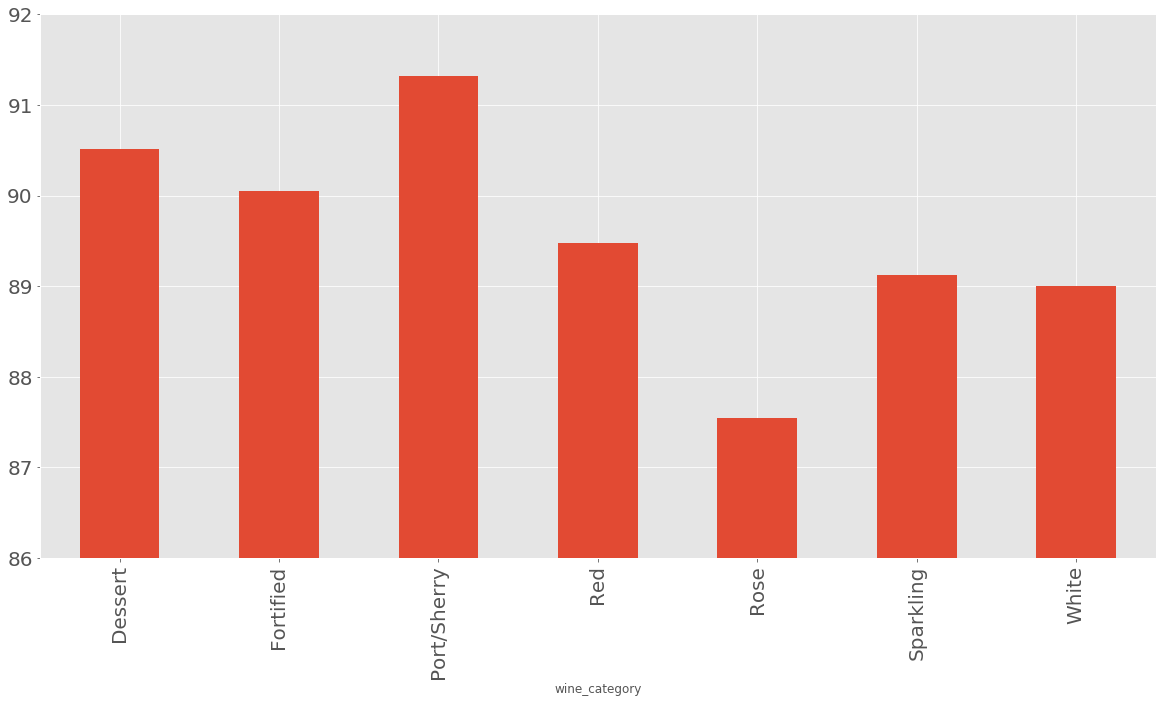

In [17]:
#in Total , by category, mean of wine point
meanG_category['wine_point'].plot.bar(figsize = (20,10), ylim=(86,92), fontsize = 20)

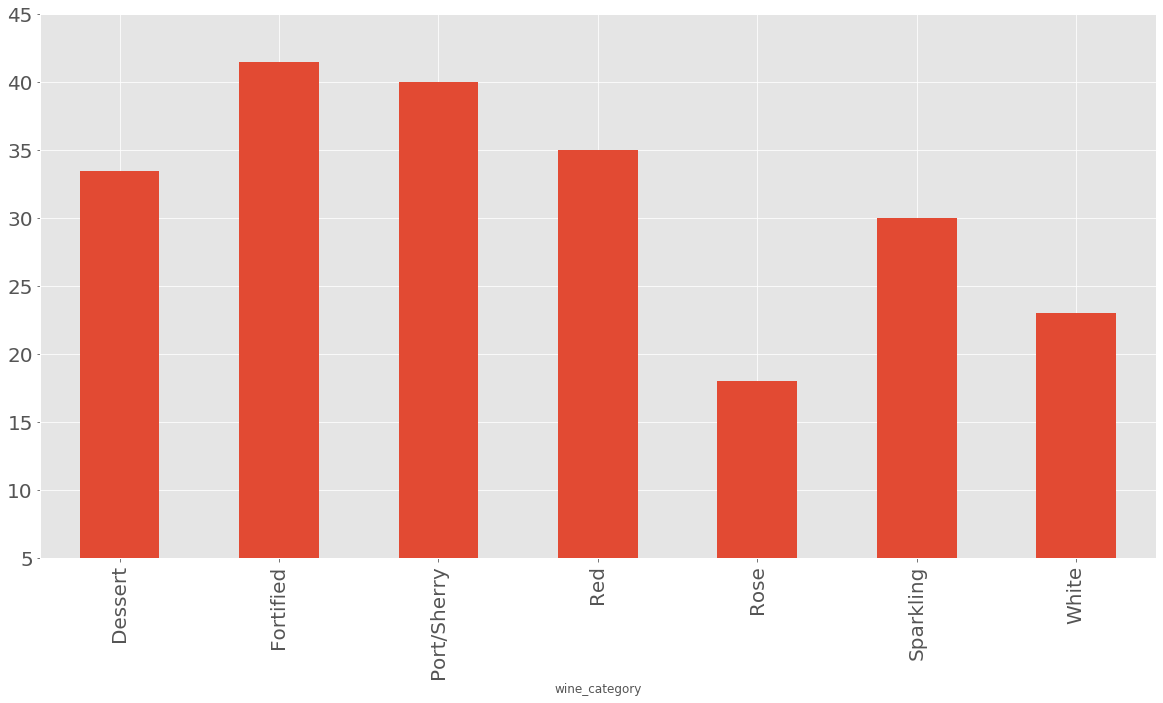

In [18]:
#in Total, by category, median of wine price
medianG_category['wine_price'].plot.bar(figsize = (20,10), ylim=(5,45) , fontsize = 20)

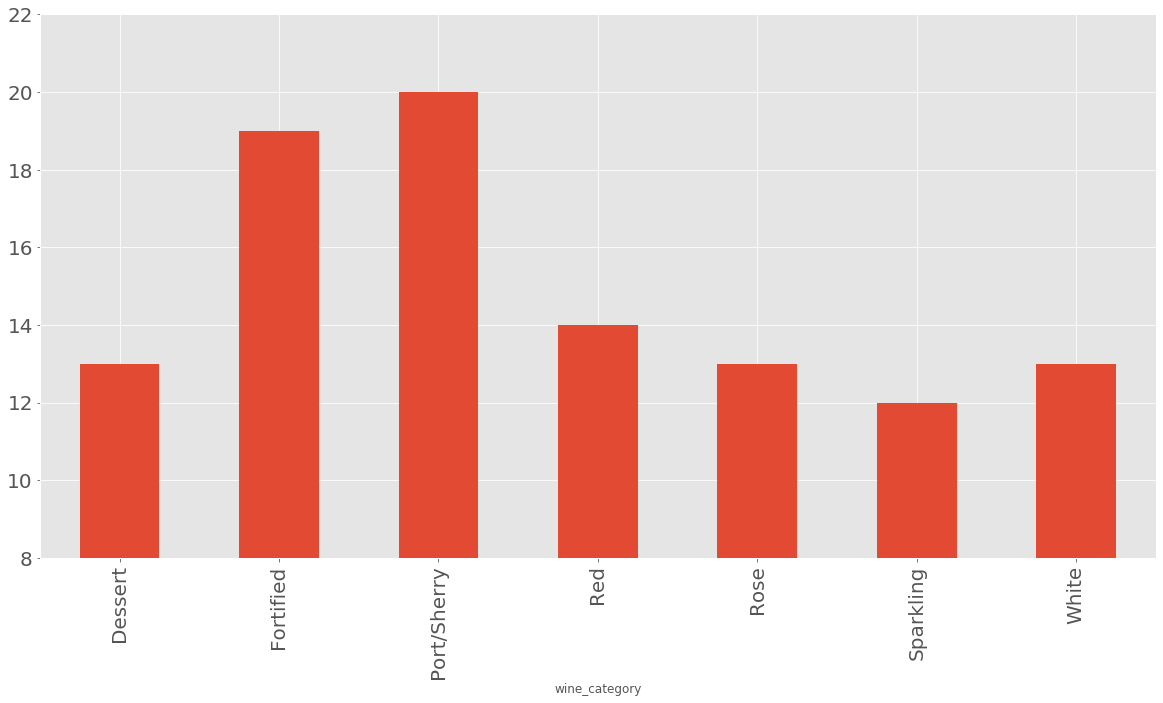

In [19]:
#in Total, by category, median of wine alcohol
medianG_category['wine_alcohol'].plot.bar(figsize = (20,10), ylim = (8,22) , fontsize = 20)

<h3> Port Wine Country/ Region </h3>

In [20]:
#for dataPort, 2216 rows - total Port counts
dataPort.index

RangeIndex(start=0, stop=2216, step=1)

Portugal    1322
US           648
Spain        246
dtype: int64


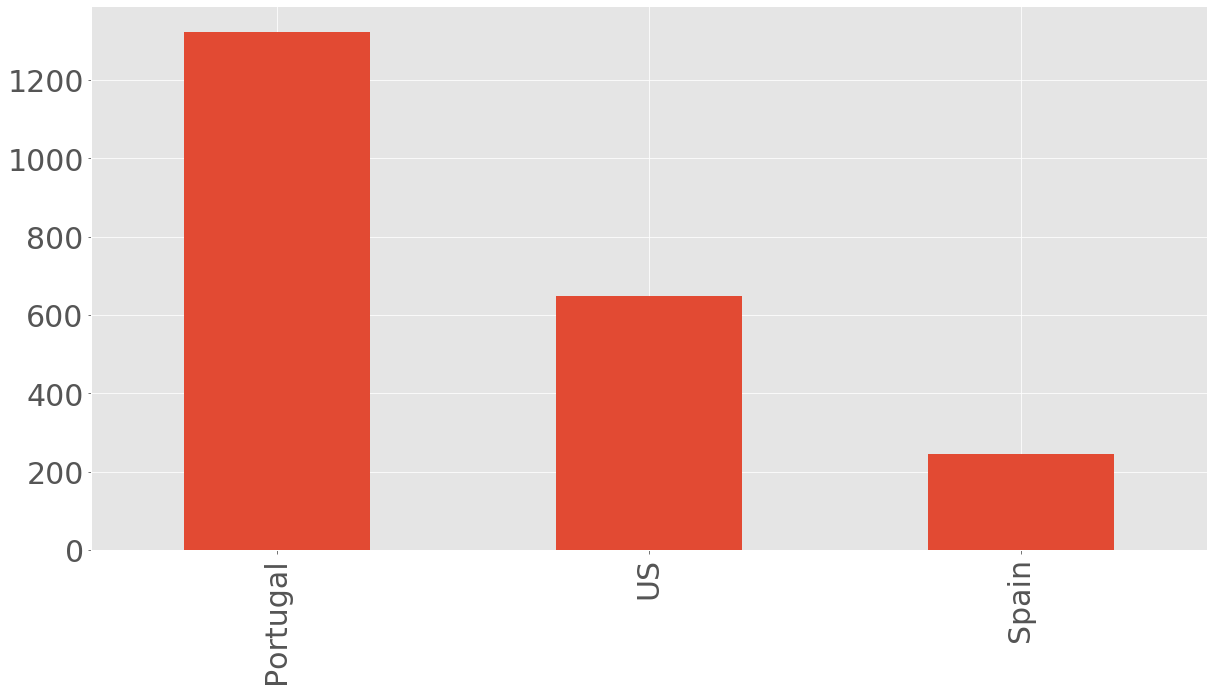

In [21]:
#how many in each country
PortCountryCount = pd.value_counts(dataPort['wine_country'].values, sort=True)
print(PortCountryCount)

# bar graph for wine_region for Port
PortCountryCount.plot.bar(figsize = (20,10), fontsize=30)

Port          1127
California     648
Andalucia      246
Douro          195
dtype: int64


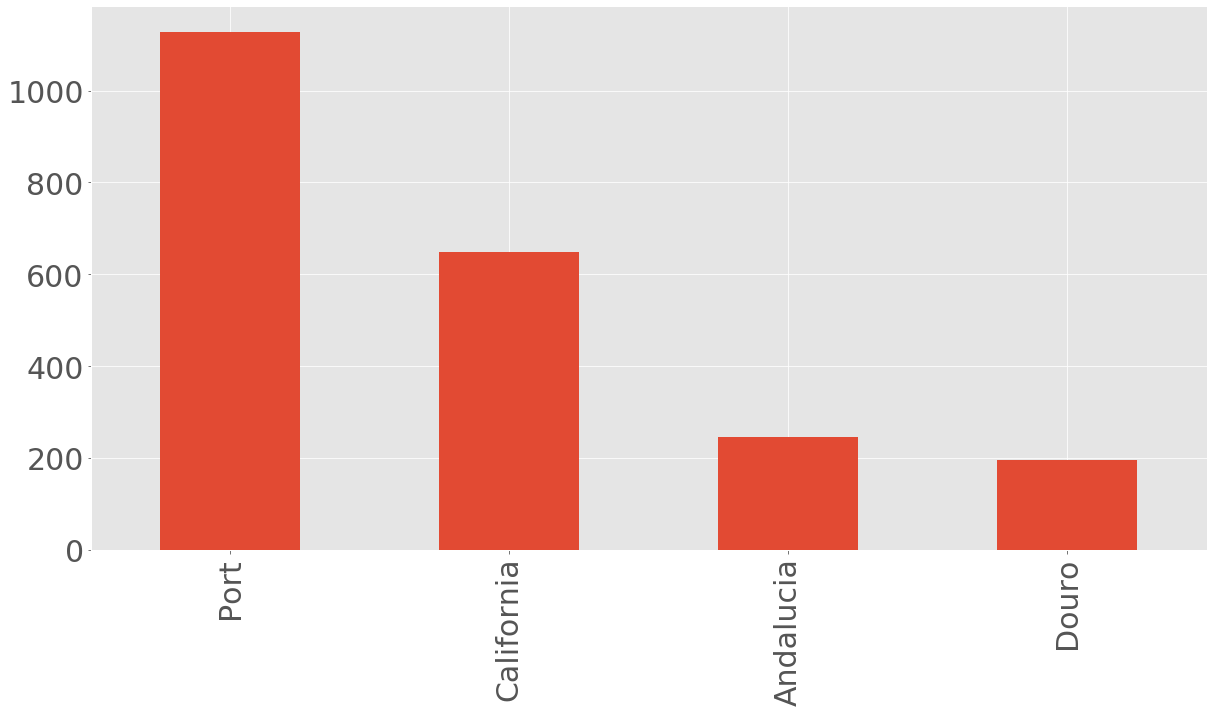

In [22]:
#how many in each region
PortRegionCount = pd.value_counts(dataPort['wine_region'].values, sort=True)
print(PortRegionCount)

# bar graph for wine_region for Port
PortRegionCount.plot.bar(figsize = (20,10), fontsize = 30)

In [23]:
#possible image screenshot?

In [24]:
#group by country
PortGCountry = dataPort.groupby('wine_country')
list(PortGCountry)

[('Portugal',       Unnamed: 0  wine_alcohol wine_category wine_country  \
  0              0          20.0   Port/Sherry     Portugal   
  1              1          20.0   Port/Sherry     Portugal   
  2              3          20.0   Port/Sherry     Portugal   
  6              8          14.0           Red     Portugal   
  7              9          20.0   Port/Sherry     Portugal   
  8             10          20.0   Port/Sherry     Portugal   
  10            13          13.5           Red     Portugal   
  11            14          20.0   Port/Sherry     Portugal   
  12            15          20.0   Port/Sherry     Portugal   
  13            16           NaN           Red     Portugal   
  14            17           NaN         White     Portugal   
  20            23          20.0   Port/Sherry     Portugal   
  23            26          20.5   Port/Sherry     Portugal   
  24            27           NaN   Port/Sherry     Portugal   
  25            28          20.0   Port/She

In [25]:
"""
- wikipedia -
Under European Union Protected Designation of Origin guidelines,
only the product from Portugal may be labelled as port or Porto.
In the United States, wines labelled "port" may come from anywhere 
in the world, while the names "Oporto", "Porto", and "Vinho do Porto" 
have been recognized as foreign, non-generic names for port wines originating in Portugal.
"""

'\n- wikipedia -\nUnder European Union Protected Designation of Origin guidelines,\nonly the product from Portugal may be labelled as port or Porto.\nIn the United States, wines labelled "port" may come from anywhere \nin the world, while the names "Oporto", "Porto", and "Vinho do Porto" \nhave been recognized as foreign, non-generic names for port wines originating in Portugal.\n'

In [26]:
#Port
Portugal = dataPort.loc[dataPort['wine_country']=='Portugal']
#Andalucia variety
PortugalVariety = pd.value_counts(Portugal['wine_variety'].values, sort=True)
print(PortugalVariety)

Port                      1194
Portuguese Red             100
Red Blends                  16
Touriga Nacional             5
Portuguese White             3
Touriga Nacional Blend       1
Tinta Roriz                  1
Tinta Barroca                1
White Port                   1
dtype: int64


In [27]:
#Portugal
Portugal = dataPort.loc[dataPort['wine_country']=='Portugal']
#Andalucia variety
PortugalVariety = pd.value_counts(Portugal['wine_variety'].values, sort=True)
print(PortugalVariety)

Port                      1194
Portuguese Red             100
Red Blends                  16
Touriga Nacional             5
Portuguese White             3
Touriga Nacional Blend       1
Tinta Roriz                  1
Tinta Barroca                1
White Port                   1
dtype: int64


In [28]:
#Spain
Spain = dataPort.loc[dataPort['wine_country']=='Spain']
#Spain variety
SpainVariety = pd.value_counts(Spain['wine_variety'].values, sort=True)
print(SpainVariety)

Sherry           173
Pedro Ximénez     46
Palomino          25
Moscatel           2
dtype: int64


In [29]:
#US
US = dataPort.loc[dataPort['wine_country']=='US']
#US variety
USVariety = pd.value_counts(US['wine_variety'].values, sort=True)
print(USVariety)

Zinfandel                   203
Port                        134
Cabernet Sauvignon           58
Syrah                        40
Red Blends                   37
Petite Sirah                 33
Bordeaux-style Red Blend     15
Merlot                       15
Pinot Noir                   14
Riesling                      7
Rhône-style Red Blend         7
Touriga Nacional              7
Barbera                       6
Grenache                      5
Petit Verdot                  5
Primitivo                     5
Chardonnay                    4
Sangiovese                    4
Cabernet Franc                4
Black Muscat                  4
Cabernet Sauvignon-Syrah      3
White Port                    3
Sherry                        3
Malbec                        3
Tempranillo                   3
White Blend                   2
Dolcetto                      2
Pinotage                      2
Touriga Franca                2
Roussanne                     1
Sparkling Blend               1
Muscat  

In [30]:
#group by region
PortGRegion = dataPort[dataPort['wine_country'] == 'Portugal'].groupby('wine_region')
list(PortGRegion)

[('Douro',       Unnamed: 0  wine_alcohol wine_category wine_country  \
  6              8          14.0           Red     Portugal   
  10            13          13.5           Red     Portugal   
  13            16           NaN           Red     Portugal   
  14            17           NaN         White     Portugal   
  20            23          20.0   Port/Sherry     Portugal   
  28            31          20.0   Port/Sherry     Portugal   
  30            34          20.0   Port/Sherry     Portugal   
  57            61          14.0           Red     Portugal   
  59            63          14.0           Red     Portugal   
  70            77          14.5           Red     Portugal   
  72            79          14.5           Red     Portugal   
  74            82          13.5           Red     Portugal   
  78            86          14.0   Port/Sherry     Portugal   
  146          167          14.0           Red     Portugal   
  147          169          13.5           Red

In [31]:
#Douro
Douro = dataPort.loc[dataPort['wine_region']=='Douro']
#Douro variety
DouroVariety = pd.value_counts(Douro['wine_variety'].values, sort=True)
print(DouroVariety)

Portuguese Red            99
Port                      73
Red Blends                11
Touriga Nacional           5
Portuguese White           3
Touriga Nacional Blend     1
Tinta Roriz                1
Tinta Barroca              1
White Port                 1
dtype: int64


In [32]:
#mean, median of numeric values by region of dataPort
PortGMeanRegion = PortGRegion.mean()
print(PortGMeanRegion)
PortGMedianRegion = PortGRegion.median()
print(PortGMedianRegion)

              Unnamed: 0  wine_alcohol  wine_point  wine_price         year
wine_region                                                                
Douro        1021.246154     15.253719   89.435897   34.641026  2004.377049
Port         1343.405501     19.889474   89.748891   61.275954  2004.471061
             Unnamed: 0  wine_alcohol  wine_point  wine_price    year
wine_region                                                          
Douro               566          14.0          89          25  2004.0
Port               1321          20.0          90          40  2007.0


In [33]:
#port
Port = dataPort.loc[dataPort['wine_region']=='Port']
#Port variety
PortVariety = pd.value_counts(Port['wine_variety'].values, sort=True)
print(PortVariety)

Port              1121
Red Blends           5
Portuguese Red       1
dtype: int64


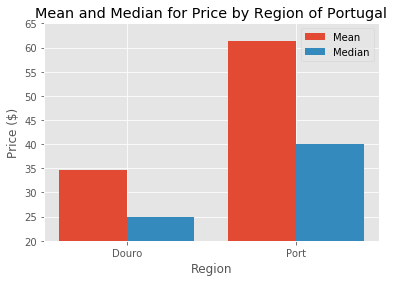

In [34]:
#Region Port - Wine price
X = ['Douro','Port']
Y = [34.64,61.27]
Z = [25,40]
_X = np.arange(len(X))


plt.xlabel("Region")
plt.ylabel("Price ($)")
plt.title("Mean and Median for Price by Region of Portugal")
plt.ylim(20, 65) 
p1 = plt.bar(_X - 0.2, Y, 0.4)
p2 = plt.bar(_X + 0.2, Z, 0.4)
plt.legend((p1[0], p2[0]), ('Mean', 'Median'))
plt.xticks(_X, X) # set labels manually
plt.show()

In [35]:
#group by country
PortGCountry = dataPort.groupby('wine_country')
list(PortGCountry)

[('Portugal',       Unnamed: 0  wine_alcohol wine_category wine_country  \
  0              0          20.0   Port/Sherry     Portugal   
  1              1          20.0   Port/Sherry     Portugal   
  2              3          20.0   Port/Sherry     Portugal   
  6              8          14.0           Red     Portugal   
  7              9          20.0   Port/Sherry     Portugal   
  8             10          20.0   Port/Sherry     Portugal   
  10            13          13.5           Red     Portugal   
  11            14          20.0   Port/Sherry     Portugal   
  12            15          20.0   Port/Sherry     Portugal   
  13            16           NaN           Red     Portugal   
  14            17           NaN         White     Portugal   
  20            23          20.0   Port/Sherry     Portugal   
  23            26          20.5   Port/Sherry     Portugal   
  24            27           NaN   Port/Sherry     Portugal   
  25            28          20.0   Port/She

In [36]:
#mean, median of numeric values by country of dataPort
PortGMeanCountry = PortGCountry.mean()
print(PortGMeanCountry)
PortGMedianCountry = PortGCountry.median()
print(PortGMedianCountry)

               Unnamed: 0  wine_alcohol  wine_point  wine_price         year
wine_country                                                                
Portugal      1295.885779     19.266222   89.702723   57.347201  2004.449689
Spain         1387.601626     17.460084   89.735772   33.077236  1939.411765
US            1321.396605     16.178019   86.157407   37.557099  2005.734454
              Unnamed: 0  wine_alcohol  wine_point  wine_price    year
wine_country                                                          
Portugal          1278.5          20.0        90.0        39.0  2007.0
Spain             1433.0          17.5        90.0        20.0  1970.0
US                1366.5          15.5        86.0        32.0  2006.0


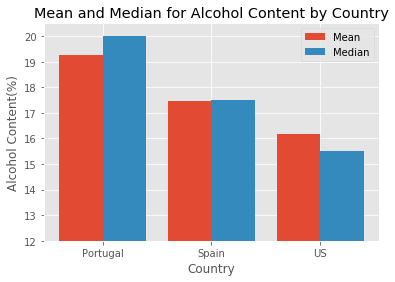

In [37]:
#alcohol content
X = ['Portugal','Spain','US']
Y = [19.27,17.46,16.17]
Z = [20,17.5,15.5]
_X = np.arange(len(X))


plt.xlabel("Country")
plt.ylabel("Alcohol Content(%)")
plt.title("Mean and Median for Alcohol Content by Country")
plt.ylim(12, 20.5) 
p1 = plt.bar(_X - 0.2, Y, 0.4)
p2 = plt.bar(_X + 0.2, Z, 0.4)
plt.legend((p1[0], p2[0]), ('Mean', 'Median'))
plt.xticks(_X, X) # set labels manually
plt.show()

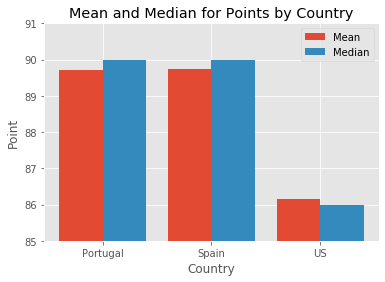

In [38]:
#wine Point
X = ['Portugal','Spain','US']
Y = [89.70,89.73,86.16]
Z = [90,90,86]
_X = np.arange(len(X))


plt.xlabel("Country")
plt.ylabel("Point")
plt.title("Mean and Median for Points by Country")
plt.ylim(85, 91) 
p1 = plt.bar(_X - 0.2, Y, 0.4)
p2 = plt.bar(_X + 0.2, Z, 0.4)
plt.legend((p1[0], p2[0]), ('Mean', 'Median'))
plt.xticks(_X, X) # set labels manually
plt.show()

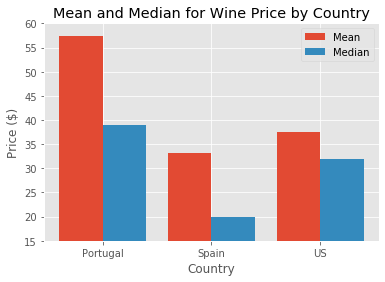

In [39]:
#wine price
X = ['Portugal','Spain','US']
Y = [57.35,33.08,37.58]
Z = [39,20,32]
_X = np.arange(len(X))


plt.xlabel("Country")
plt.ylabel("Price ($)")
plt.title("Mean and Median for Wine Price by Country")
plt.ylim(15, 60) 
p1 = plt.bar(_X - 0.2, Y, 0.4)
p2 = plt.bar(_X + 0.2, Z, 0.4)
plt.legend((p1[0], p2[0]), ('Mean', 'Median'))
plt.xticks(_X, X) # set labels manually
plt.show()

In [40]:
#Compare to total mean of alcohol, price, point
print('Average Price of Wines on WEMag: ' + str(dataTotal['wine_price'].mean()))
print('Average Alcohol Content of Wines on WEMAG: '+str(dataTotal['wine_alcohol'].mean()))
print('Average Point of Wines on WEMag: '+str(dataTotal['wine_point'].mean()))

Average Price of Wines on WEMag: 38.26423145856448
Average Alcohol Content of Wines on WEMAG: 13.58958223094654
Average Point of Wines on WEMag: 89.23909703849108


In [41]:
fig = px.scatter(dataPort, x="year", y="wine_price", color ="wine_country" )
fig.show()

In [42]:
#year vs. price
dataYrPrice = [Scatter(x=dataPort['year'], y=dataPort['wine_price'], mode = 'markers', text=dataPort['wine_country'])]
layout = Layout(title="Year vs Price")

fig = Figure(data=dataYrPrice, layout=layout)
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Price ($)')

plotly.offline.iplot(fig, show_link=False)

In [43]:
#word cloud
#stopwords
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors", "aroma", "aromas", "finish", "note", "show", "notes"])

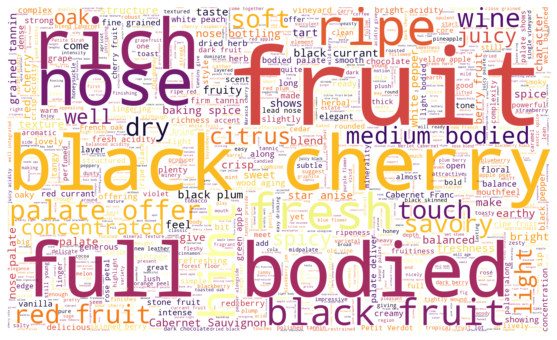

In [44]:
#WordCloud for all wines
wc = WordCloud(stopwords=stopwords,background_color="white", max_words=1000, width=1000, height=600,colormap = plt.cm.inferno, scale = 2.0)
wc.generate(' '.join(dataTotal['wine_description']))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

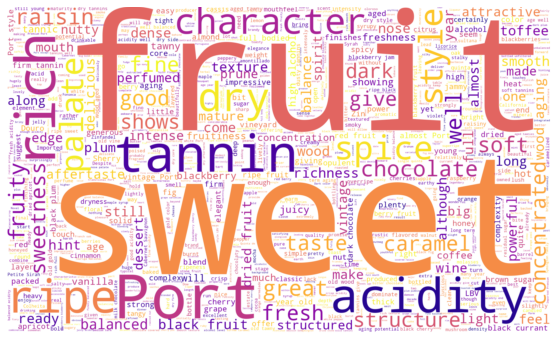

In [45]:
#WordCloud for port wines
wc = WordCloud(stopwords=stopwords,background_color="white", max_words=1000, width=1000, height=600,colormap = plt.cm.plasma, scale = 2.0)
wc.generate(' '.join(dataPort['wine_description']))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()